# 1. Importación de librerías

En este apartado se realiza la importación de las librerías requeridas para la carga, tratamiento y visualización de los datos, además de la generación del modelo.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score,recall_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

# 2. Carga de datos

Se realiza la carga del dataset con el cual se trabajará.

In [3]:
#Importación de la data.
data = pd.read_csv('twitter_human_bots_dataset.csv')

# 3. Análisis Exploratorio de Datos (EDA) ##

En el proceso de análisis exploratoio de los datos, se exploran y analizan los datos que contiene el dataset para revisar sus principales características, con la finalidad de entender su estructura, conocer sus variables y datos, revisar sus estadísticos, detectar patrones o relaciones entre variables, entre otros.

## 3.1 Exploración inicial ###

In [4]:
#Se explora la cantidad de filas y columnas que posee el dataset.
data.shape

(37438, 23)

In [5]:
#Se muestran las primeras columnas para revisar la data que contien el dataset.
data.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,...,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,profile_image_path,profile_background_image_path,split
0,0,2009-07-04 22:41:51,False,False,NaN,5007,102,168,False,53779179,...,https://pbs.twimg.com/profile_images/128969130...,paty_castroo,3974,False,0.978,4063,bot,NaN,NaN,0
1,1,2010-01-17 22:54:19,False,False,Television producer. Emmy Award winner. Disney...,1038,60,128,False,105916557,...,https://pbs.twimg.com/profile_images/632916759...,CBirckner,259,False,0.067,3866,human,profile_images/4691ae58668d932bb7e7af22141aecf...,profile_images/4691ae58668d932bb7e7af22141aecf...,0
2,2,2012-03-01 06:05:32,False,False,NaN,2257,599,449,True,509788597,...,https://pbs.twimg.com/profile_images/128853844...,amf_jay,13627,False,4.406,3093,human,NaN,NaN,0
3,3,2009-09-01 04:52:30,False,False,NaN,6407,116,334,True,70601327,...,https://pbs.twimg.com/profile_images/977012905...,SaraCavolo,4432,False,1.107,4005,human,profile_images/d1da9220e4aa376dff03b6f12765171...,profile_images/d1da9220e4aa376dff03b6f12765171...,0
4,4,2010-01-27 17:17:23,False,False,Productor de Televisión - Embajador de @Tienda...,20866,74448,18,True,108999927,...,https://pbs.twimg.com/profile_images/668449819...,DavidHenaoModel,15870,True,4.116,3856,human,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,0


In [6]:
#Se analizan los estadísticos de las variables numéricas.
data.describe()

,Unnamed: 0,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days,split
count,37438.000000,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000,37438.000000
mean,18718.500000,12302.062183,3.703098e+05,4.445925e+03,1.221536e+17,2.107339e+04,6.891668,3022.128052,0.300043
std,10807.564026,33923.650237,2.470829e+06,4.954520e+04,3.004313e+17,6.732977e+04,24.580116,1013.695870,0.640384
min,0.000000,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000,0.000000
25%,9359.250000,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000,0.000000
50%,18718.500000,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000,0.000000
75%,28077.750000,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000,0.000000
max,37437.000000,885123.000000,1.216415e+08,4.343060e+06,1.120974e+18,2.771910e+06,1269.055000,5158.000000,2.000000


## 3.2 Calidad del dato ###

In [7]:
#Se muestra información relevante de cada variable.
#Se observa que en su mayoría las variables son de tipo Object, int64 y bool.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     37438 non-null  int64  
 1   created_at                     37438 non-null  object 
 2   default_profile                37438 non-null  bool   
 3   default_profile_image          37438 non-null  bool   
 4   description                    30181 non-null  object 
 5   favourites_count               37438 non-null  int64  
 6   followers_count                37438 non-null  int64  
 7   friends_count                  37438 non-null  int64  
 8   geo_enabled                    37438 non-null  bool   
 9   id                             37438 non-null  int64  
 10  lang                           29481 non-null  object 
 11  location                       37434 non-null  object 
 12  profile_background_image_url   32939 non-null 

In [8]:
#Se muestra el total de registros nulos por varibles.
data.isnull().sum()

Unnamed: 0                           0
created_at                           0
default_profile                      0
default_profile_image                0
description                       7257
favourites_count                     0
followers_count                      0
friends_count                        0
geo_enabled                          0
id                                   0
lang                              7957
location                             4
profile_background_image_url      4499
profile_image_url                    1
screen_name                          0
statuses_count                       0
verified                             0
average_tweets_per_day               0
account_age_days                     0
account_type                         0
profile_image_path               12938
profile_background_image_path    12938
split                                0
dtype: int64

In [9]:
#Se revisa el número de filas duplicadas.
print(f"Total filas duplicadas: {data.duplicated().sum()}")

Total filas duplicadas: 0


In [10]:
#Se revisa el número de valores únicos por cada variable del dataset.
data.select_dtypes(include=['object','bool','int64','float64']).nunique()

Unnamed: 0                       37438
created_at                       37430
default_profile                      2
default_profile_image                2
description                      29944
favourites_count                 15004
followers_count                  13210
friends_count                     5301
geo_enabled                          2
id                               37438
lang                                48
location                         12049
profile_background_image_url        20
profile_image_url                36880
screen_name                      37438
statuses_count                   19189
verified                             2
average_tweets_per_day           12636
account_age_days                  4156
account_type                         2
profile_image_path               23943
profile_background_image_path    23943
split                                3
dtype: int64

## 3.3 Eliminación de variables ###

Se eliminan las siguientes columnas:

**'Unnamed: 0'**: Solo es el indice del dataset, no entrega mayor información.

**'profile_image_url'**: Se puede deducir con la variable 'default_profile_image'.

**'profile_image_path'**: Se puede deducir con la variable 'profile_image_url'.

**'profile_background_image_path'**: Se puede deducir con la variable 'profile_image_url'.

**'split'**: Datos innecesarios sobre la división del dataset para el entrenamiento.

**'id'**: No entrega mayor información.

In [11]:
#Eliminar columnas innecesarias
data_dep = data.drop(columns=['Unnamed: 0', 'profile_image_path', 'profile_background_image_path', 'split', 'id', 'profile_image_url'])

In [12]:
#Verificar los cambios mostrando las primeras filas del DataFrame modificado.
data_dep.columns

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'lang', 'location', 'profile_background_image_url', 'screen_name',
       'statuses_count', 'verified', 'average_tweets_per_day',
       'account_age_days', 'account_type'],
      dtype='object')

## 3.4 Imputación de datos nulos ###

Se realiza la imputación de datos nulos para evitar la pérdida de información valiosa (se produciría al eliminar filas), evitar que los modelos generen resultados inexactos y mantener la consistencia de los datos.

Las siguientes variables son las que poseen datos nulos: 'description','lang','location'y 'profile_background_image_url'.

In [13]:
#Agregar un nuevo valor a los datos nulos por cada variable
data_dep['description'].fillna('No description', inplace=True)
data_dep['lang'].fillna('No lang', inplace=True)
data_dep['location'].fillna('Unknown', inplace=True)
data_dep['profile_background_image_url'].fillna('No image', inplace=True)

In [14]:
#Revisión imputación valores
data_dep.isnull().sum()

created_at                      0
default_profile                 0
default_profile_image           0
description                     0
favourites_count                0
followers_count                 0
friends_count                   0
geo_enabled                     0
lang                            0
location                        0
profile_background_image_url    0
screen_name                     0
statuses_count                  0
verified                        0
average_tweets_per_day          0
account_age_days                0
account_type                    0
dtype: int64

## 3.5 Transformación tipo de datos ###

Se han transformado datos para mejorar la interpretación de estos (obtener escalas uniformes y distribuciones normales), optimizaicón del rendimiento de los modelos (convergencia más rápida y reducción del sesgo), mejorar la relación entre variables y mejora del análisis y visualización.

Las siguientes variables son a la que se les realiza la transformación del tipo de datos: 'created_at','description','lang','lang','location','location', 'screen_name'y 'account_type'.

In [15]:
#Convertir 'created_at' a tipo fecha
data_dep['created_at'] = pd.to_datetime(data_dep['created_at'])

In [16]:
#Convertir el tipo de dato de las columnas 'description', 'lang', 'location', y 'screen_name' a string
data_dep['description'] = data_dep['description'].astype(str)
data_dep['lang'] = data_dep['lang'].astype(str)
data_dep['location'] = data_dep['location'].astype(str)
data_dep['screen_name'] = data_dep['screen_name'].astype(str)

In [17]:
#Cambiar 'account_type' a booleano
data_dep['account_type'] = data_dep['account_type'].map({'bot': 1, 'human': 0})

In [18]:
# Renombrar las columnas para mejor legibilidad
data_dep = data_dep.rename(columns={
    'friends_count': 'following_count',
    'statuses_count': 'retweet_tweets_count'
})

In [19]:
data_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   created_at                    37438 non-null  datetime64[ns]
 1   default_profile               37438 non-null  bool          
 2   default_profile_image         37438 non-null  bool          
 3   description                   37438 non-null  object        
 4   favourites_count              37438 non-null  int64         
 5   followers_count               37438 non-null  int64         
 6   following_count               37438 non-null  int64         
 7   geo_enabled                   37438 non-null  bool          
 8   lang                          37438 non-null  object        
 9   location                      37438 non-null  object        
 10  profile_background_image_url  37438 non-null  object        
 11  screen_name                 

## 3.6 Creación de variables ###

Crear nuevas variables ayuda a enriquecer los datos, mejorar el rendimiento de los modelos y ayudar a descubrir patrones y relaciones más complejas, lo que resulta en análisis más precisos y efectivos.

#### Ratio de actividad según antiguedad de la cuenta ####
Proporción de estados dividiendo el valor de la columna 'statuses_count' por el valor de la columna 'account_age_days'.

In [20]:
data_dep['ratio_statuses_count_per_age'] = data_dep['retweet_tweets_count'] / data_dep['account_age_days']

#### Proporción siguiendo - seguidos

Proporción de amigos dividiendo el valor de la columna 'friends_count' por el valor de la columna 'followers_count'.


In [21]:
data_dep['ratio_following_per_followers'] = (data_dep['following_count'] / data_dep['followers_count']).round(3)

#### Proporción de favoritos por antiguedad de la cuenta

Proporción de favoritos dividiendo el valor de la columna 'favourites_count' por el valor de la columna 'account_age_days'.

In [22]:
data_dep['ratio_favorites_per_age'] = data_dep['favourites_count'] / data_dep['account_age_days']

#### Popularidad según los seguidores y seguidos

Proporción de popularidad dividiendo el número de seguidores por el número total de seguidores y amigos

In [23]:
data_dep['popular_indicator'] = data_dep['followers_count'] / (data_dep['followers_count'] + data_dep['following_count'])

#### Tiene descripción ####

Si es que tiene descripción o no.

In [24]:
data_dep['has_description'] = data_dep['description'].apply(lambda x: 0 if x == 'No description' else 1)

#### Tiene imagen de fondo de perfil

Si es que tiene imagen de fondo de perfil o no.

In [25]:
data_dep['has_background_image_url'] = data_dep['profile_background_image_url'].apply(lambda x: 0 if x == 'No image'  else 1)

#### Tiene ubicación ####

Si es que tiene ubicación o no.

In [26]:
data_dep['has_location'] = data_dep['location'].apply(lambda x: 0 if x.lower() == 'unknown' else 1)

#### Tiene Idioma ####

Si es que tiene idioma o no.

In [27]:
data_dep['has_lang'] = data_dep['lang'].apply(lambda x: 0 if x == 'No lang' else 1)

#### Cadena del conteo de palabras en la descripción
Número de palabras en la columna 'description' y convertir este valor en cadena.

In [28]:
data_dep['word_count'] = data_dep['description'].apply(lambda x: len(str(x).split(" ")))

#### Conteo de palabras en la descripción
Contar el número de palabras en cada entrada de la columna 'description' y guardar el resultado en una nueva columna 'description_word_count'.


In [29]:
data_dep['description_word_count'] = data_dep['description'].apply(lambda x: len(str(x).split()))

#### Número de caracteres en la descripción

Contar el número de caracteres en cada palabra en la columna 'description', luego sumarlos y guardarlos en la columna 'description_character_count'.


In [30]:
data_dep['description_character_count'] = data_dep['description'].apply(lambda x: sum(len(word) for word in str(x).split()))

#### Promedio de caracteres por palabra en la descripción

Calcular el promedio de caracteres por palabra en la columna 'description' y guardarlo en la columna 'avg_word'.

In [31]:
data_dep['avg_word'] = data_dep['description_character_count'] / data_dep['description_word_count']

#### Bot name ####

Si es que el usuario tiene dentro de su nombre palabras que puedan ser asociadas a un bot.


- **'bot', 'b0t', 'twitterbot', 'automated'**: son términos directamente relacionados con bots.

- **'updates', 'hourly', 'automatically', 'generating', 'generated', 'every'**: son términos que a menudo están presentes en descripciones de cuentas de bots que proporcionan actualizaciones automáticas o generadas automáticamente.

- **'computer-generated', 'FakeBots'**: pueden ser indicativos de cuentas que son conocidas por ser bots falsos o generados por computadora.

In [32]:
#Expresión regular para identificar palabras clave asociadas a bots
palabras_claves = r"\b(bot|b0t|updates|hourly|automatically|generating|generated|every|computer-generated|twitterbot|automated|FakeBots|')\b|Bots"
 
# Crear la nueva columna 'contains_bot_in_name' y asignar 1 si se encuentra alguna palabra clave, de lo contrario 0
data_dep['contains_bot_in_name'] = data_dep['description'].str.contains(palabras_claves, flags=re.IGNORECASE).astype(int)

<ipython-input-32-19e3e10ebf7e>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_dep['contains_bot_in_name'] = data_dep['description'].str.contains(palabras_claves, flags=re.IGNORECASE).astype(int)


In [33]:
#Verificar la cantidad de usuarios que contienen palabras asociadas a un bot en su nombre de usuario.
data_dep['contains_bot_in_name'].fillna(0).astype(bool).sum(axis=0)

3271

#### Información a partir de la fecha

Se extraen las características numéricas que pueden ser relevantes para el modelo, como el año, el mes y el día.

In [34]:
data_dep['year'] = data_dep['created_at'].dt.year
data_dep['month'] = data_dep['created_at'].dt.month
data_dep['day'] = data_dep['created_at'].dt.day

#### Elimincación variables repetitivas (a partir de las creadas)

In [35]:
#Eliminar columnas repetitivas
data_dep = data_dep.drop(columns=['description','profile_background_image_url', 'lang', 'location', 'screen_name', 'created_at'])

In [36]:
#Verificar los cambios mostrando las primeras filas del DataFrame modificado.
data_dep.columns

Index(['default_profile', 'default_profile_image', 'favourites_count',
       'followers_count', 'following_count', 'geo_enabled',
       'retweet_tweets_count', 'verified', 'average_tweets_per_day',
       'account_age_days', 'account_type', 'ratio_statuses_count_per_age',
       'ratio_following_per_followers', 'ratio_favorites_per_age',
       'popular_indicator', 'has_description', 'has_background_image_url',
       'has_location', 'has_lang', 'word_count', 'description_word_count',
       'description_character_count', 'avg_word', 'contains_bot_in_name',
       'year', 'month', 'day'],
      dtype='object')

## 3.7 Depuración de las nuevas variables

Hay errores por valores negativos y nulos.

In [37]:
data_dep.shape

(37438, 27)

In [38]:
data_dep.isnull().sum()

default_profile                     0
default_profile_image               0
favourites_count                    0
followers_count                     0
following_count                     0
geo_enabled                         0
retweet_tweets_count                0
verified                            0
average_tweets_per_day              0
account_age_days                    0
account_type                        0
ratio_statuses_count_per_age        0
ratio_following_per_followers    1034
ratio_favorites_per_age             0
popular_indicator                1034
has_description                     0
has_background_image_url            0
has_location                        0
has_lang                            0
word_count                          0
description_word_count              0
description_character_count         0
avg_word                            0
contains_bot_in_name                0
year                                0
month                               0
day         

In [39]:
#Reemplazar los valores faltantes en la columna 'popular_indicator' y 'ratio_following_per_followers' con el valor 0

data_dep["popular_indicator"].fillna(0, inplace=True)
data_dep["ratio_following_per_followers"].fillna(0, inplace=True)

#Reemplazar valores infinitos con 0
data_dep.replace([np.inf, -np.inf], 0, inplace=True)

In [40]:
#Se muestra el total de registros nulos por varibles.
data_dep.isnull().sum()

default_profile                  0
default_profile_image            0
favourites_count                 0
followers_count                  0
following_count                  0
geo_enabled                      0
retweet_tweets_count             0
verified                         0
average_tweets_per_day           0
account_age_days                 0
account_type                     0
ratio_statuses_count_per_age     0
ratio_following_per_followers    0
ratio_favorites_per_age          0
popular_indicator                0
has_description                  0
has_background_image_url         0
has_location                     0
has_lang                         0
word_count                       0
description_word_count           0
description_character_count      0
avg_word                         0
contains_bot_in_name             0
year                             0
month                            0
day                              0
dtype: int64

## 3.8 Visualización de datos ###

La visualización de datos es esencial en el EDA porque proporciona una forma interactiva de comprender, comunicar y explorar la información contenida en los datos.

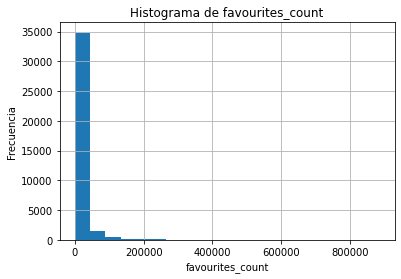

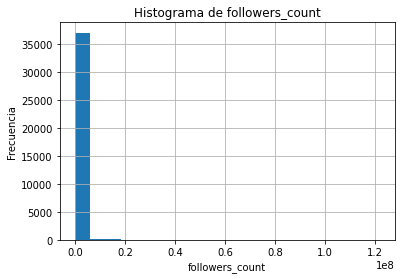

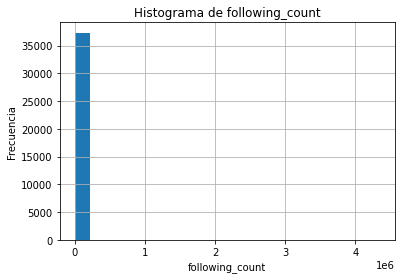

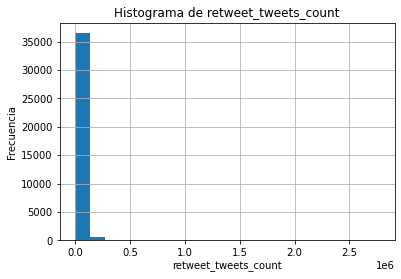

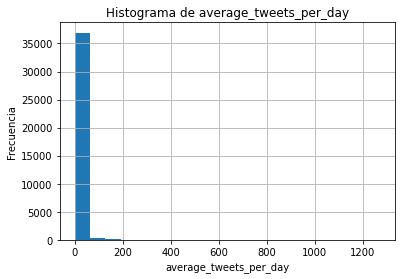

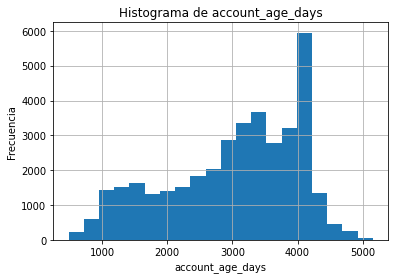

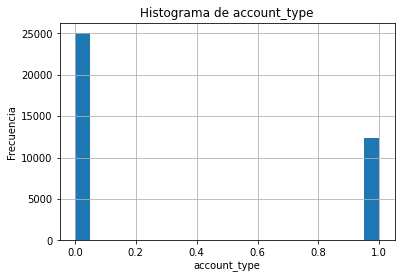

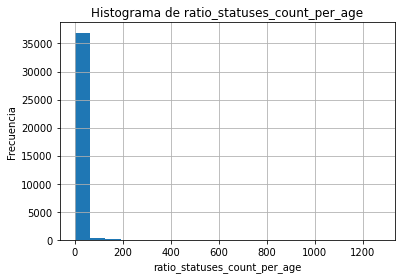

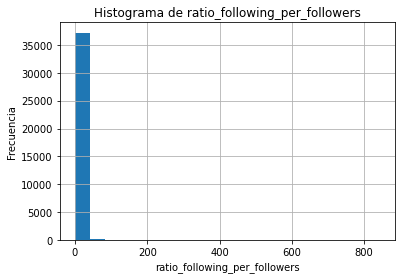

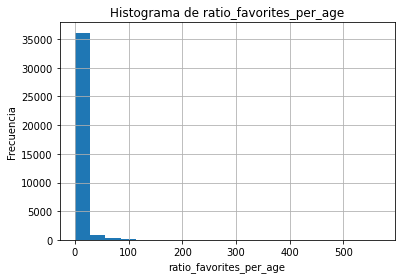

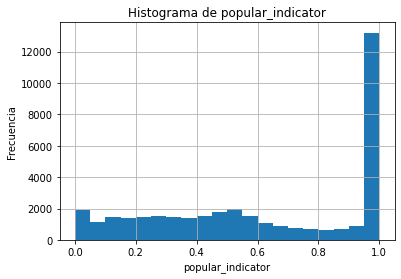

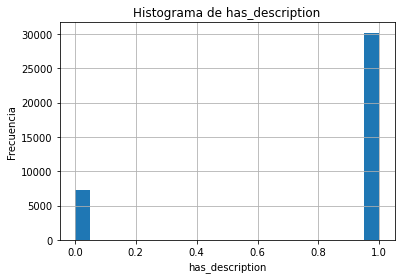

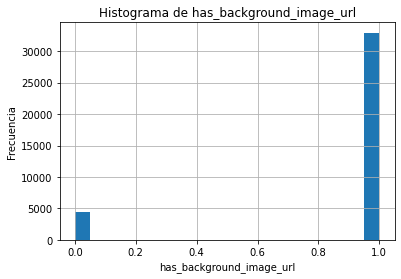

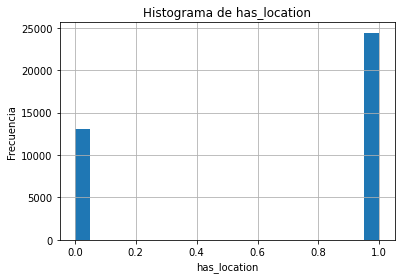

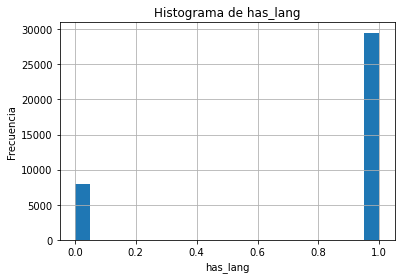

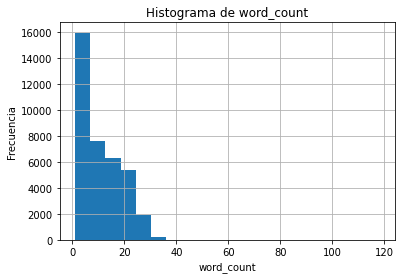

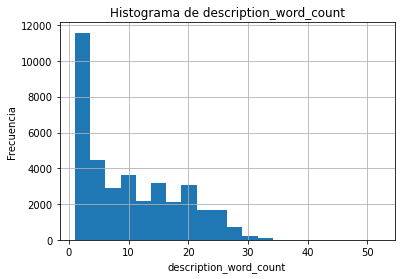

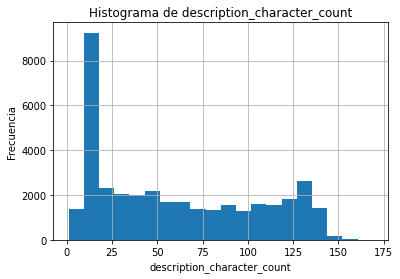

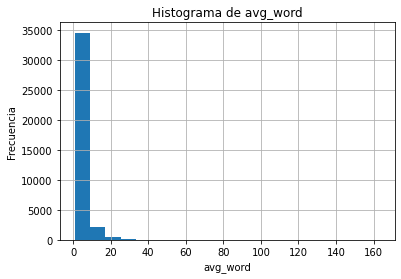

In [41]:
#Visualización variables númericas
#Histograma

for column in data_dep.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    data_dep[column].hist(bins=20)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

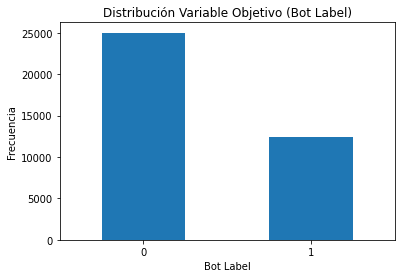

In [42]:
#Distribucuón variable objetivo
data_dep['account_type'].value_counts().plot(kind='bar')
plt.title('Distribución Variable Objetivo (Bot Label)')
plt.xlabel('Bot Label')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

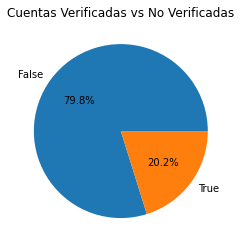

In [43]:
#Análisis de cuentas verificadas versus no verificadas
verified_counts = data_dep['verified'].value_counts()
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%')
plt.title('Cuentas Verificadas vs No Verificadas')
plt.show()

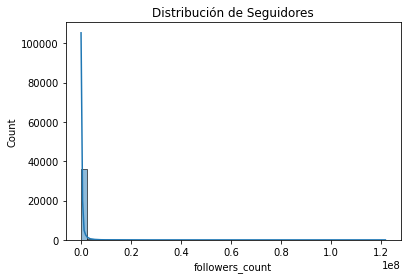

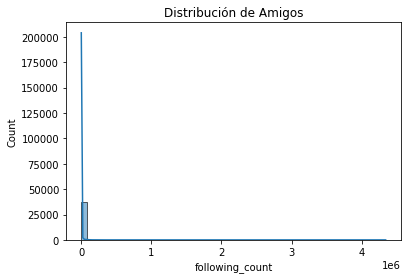

In [44]:
#Distribución de seguidores y amigos
sns.histplot(data_dep['followers_count'], bins=50, kde=True)
plt.title('Distribución de Seguidores')
plt.show()

sns.histplot(data_dep['following_count'], bins=50, kde=True)
plt.title('Distribución de Amigos')
plt.show()

## 3.9 Análisis de correlaciones ###

El análisis de correlación es una herramienta fundamental en el EDA que proporciona información valiosa sobre la relación entre variables, lo que facilita la toma de decisiones informadas en análisis posteriores y en la construcción de modelos predictivos.

**Matriz de correlación**

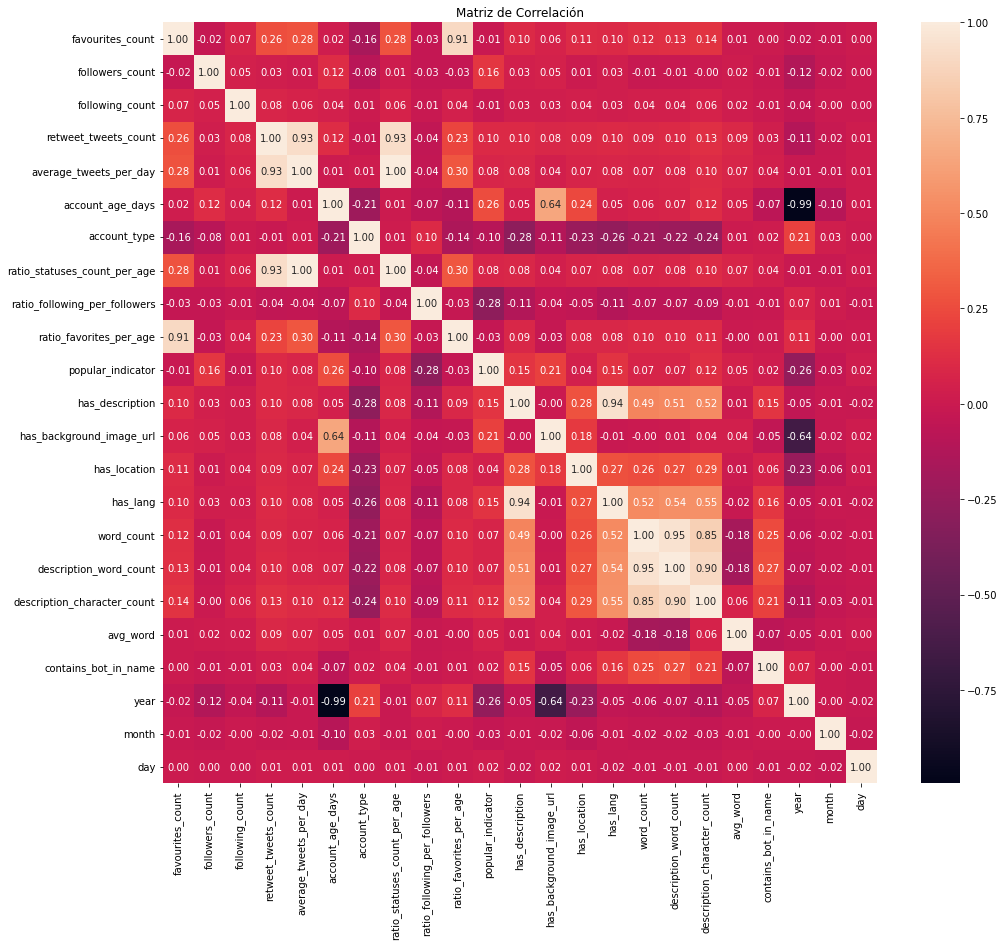

In [45]:
#Correlación entre variables
#Matriz de correlación
num_data = data_dep.select_dtypes(include='number')
corr_matrix = num_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Correlación de Spearman**

                               favourites_count  followers_count  \
favourites_count                       1.000000         0.346601   
followers_count                        0.346601         1.000000   
following_count                        0.537843         0.642473   
retweet_tweets_count                   0.578703         0.654346   
average_tweets_per_day                 0.576589         0.603711   
account_age_days                       0.157650         0.427615   
account_type                          -0.322031        -0.501959   
ratio_statuses_count_per_age           0.576590         0.603710   
ratio_following_per_followers          0.240001        -0.242910   
ratio_favorites_per_age                0.983736         0.287920   
popular_indicator                     -0.117931         0.366285   
has_description                        0.143529         0.340922   
has_background_image_url               0.213125         0.347636   
has_location                           0.231200 

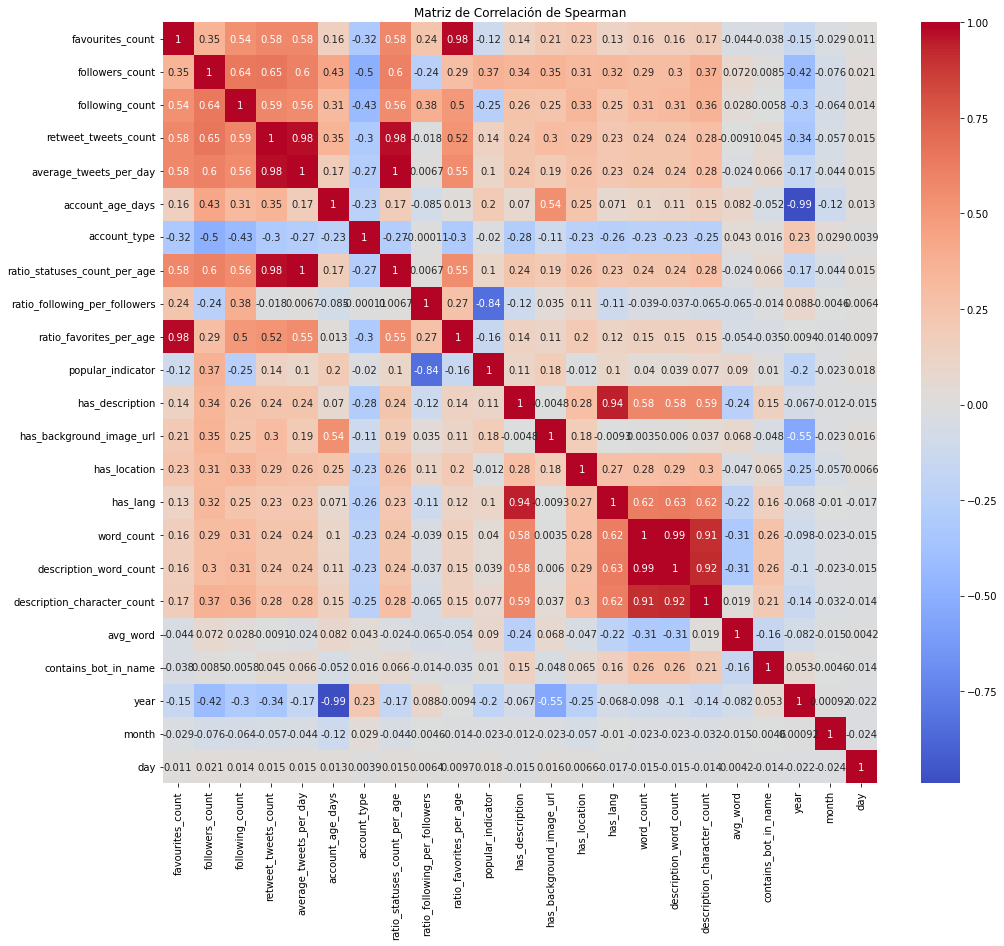

In [46]:
#Supongamos que 'data_dep' es tu dataframe con las variables numéricas
#Calculamos la matriz de correlación de Spearman
data_dep_numeric = data_dep.select_dtypes(include='number')
spearman_corr_matrix = data_dep_numeric.corr(method='spearman')

#Mostrar la matriz de correlación
print(spearman_corr_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Spearman')
plt.show()

## 3.10 Codificación de variables ###

Al momento de trabajar algoritmos de aprendizaje automático, es común necesitar convertir variables categóricas en valores numéricos, ya que muchos algoritmos de aprendizaje automático solo pueden trabajar con estos tipos de datos.

#### Label Encoding ####

Para las variables que solo tienen dos categorías: 'default_profile', 'default_profile_image', 'geo_enabled', 'verified' (verdadero/falso), se puede usar una codificanción binaria simple, convirtiendo dos categorías en 0 y 1. Esto resulta efectivo para variables booleanas y es computacionalmente eficiente.

In [47]:
data_dep['default_profile'] = data_dep['default_profile'].astype(int)
data_dep['default_profile_image'] = data_dep['default_profile_image'].astype(int)
data_dep['geo_enabled'] = data_dep['geo_enabled'].astype(int)
data_dep['verified'] = data_dep['verified'].astype(int)

In [48]:
data_dep.head()

,default_profile,default_profile_image,favourites_count,followers_count,following_count,geo_enabled,retweet_tweets_count,verified,average_tweets_per_day,account_age_days,...,has_location,has_lang,word_count,description_word_count,description_character_count,avg_word,contains_bot_in_name,year,month,day
0,0,0,5007,102,168,0,3974,0,0.978,4063,...,1,0,2,2,13,6.500000,0,2009,7,4
1,0,0,1038,60,128,0,259,0,0.067,3866,...,1,1,11,11,76,6.909091,0,2010,1,17
2,0,0,2257,599,449,1,13627,0,4.406,3093,...,0,0,2,2,13,6.500000,0,2012,3,1
3,0,0,6407,116,334,1,4432,0,1.107,4005,...,1,0,2,2,13,6.500000,0,2009,9,1
4,0,0,20866,74448,18,1,15870,1,4.116,3856,...,1,1,13,13,126,9.692308,0,2010,1,27


In [49]:
data_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   default_profile                37438 non-null  int32  
 1   default_profile_image          37438 non-null  int32  
 2   favourites_count               37438 non-null  int64  
 3   followers_count                37438 non-null  int64  
 4   following_count                37438 non-null  int64  
 5   geo_enabled                    37438 non-null  int32  
 6   retweet_tweets_count           37438 non-null  int64  
 7   verified                       37438 non-null  int32  
 8   average_tweets_per_day         37438 non-null  float64
 9   account_age_days               37438 non-null  int64  
 10  account_type                   37438 non-null  int64  
 11  ratio_statuses_count_per_age   37438 non-null  float64
 12  ratio_following_per_followers  37438 non-null 

## 4. Modelado de datos (Random Forest) ###

Para este caso se optó por realizar un modelo de random forest.

#### Funciones modelo

In [50]:
def eval_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return y_pred

def matriz_conf(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
def curva_ROC_AUC(modelo, X_test, y_test):
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

def valid_cruzada(modelo, X, y, cv=10, title=''):
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    print(f"Precisión con validación cruzada ({title}): {scores.mean()}")
    
    

### 4.1 División del dataset  y configuración de características

Se dividen los datos en conjuntos de entrenamiento y prueba para poder evaluar el modelo.

In [51]:
X = data_dep.drop(['account_type'], axis=1)
y = data_dep['account_type']
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X, y, test_size=0.2, random_state=42) 


In [52]:
# Número de muestras en y_com
num_muestras_y = len(y)
print(f"Número de muestras en y_com: {num_muestras_y}")

# Número de muestras en y_train_com
num_muestras_y_train_com = len(y_train_com)
print(f"Número de muestras en y_train_com: {num_muestras_y_train_com}")

# Número de muestras en y_test_com
num_muestras_y_test_com = len(y_test_com)
print(f"Número de muestras en y_test_com: {num_muestras_y_test_com}")

Número de muestras en y_com: 37438
Número de muestras en y_train_com: 29950
Número de muestras en y_test_com: 7488


In [53]:
print("Número de muestras en y:", np.bincount(y)) 
print("Número de muestras en y_train_com:", np.bincount(y_train_com)) 
print("Número de muestras en y_test_com:", np.bincount(y_test_com)) 

Número de muestras en y: [25013 12425]
Número de muestras en y_train_com: [19980  9970]
Número de muestras en y_test_com: [5033 2455]


### 4.2 Construcción del modelo

In [54]:
rf_com = RandomForestClassifier(n_estimators=100, random_state=42) 
start_time_com = time.time()
rf_com.fit(X_train_com, y_train_com)
end_time_com = time.time()
execution_time_com = end_time_com - start_time_com
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time_com} segundos.")

El tiempo de ejecución del entrenamiento fue de 8.138485670089722 segundos.


### 4.3 Evaluación del modelo

In [55]:
#Reporte de clasificación y precisión 
y_pred_com = eval_modelo(rf_com, X_test_com, y_test_com)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5033
           1       0.86      0.77      0.81      2455

    accuracy                           0.88      7488
   macro avg       0.88      0.85      0.86      7488
weighted avg       0.88      0.88      0.88      7488

Accuracy: 0.8830128205128205


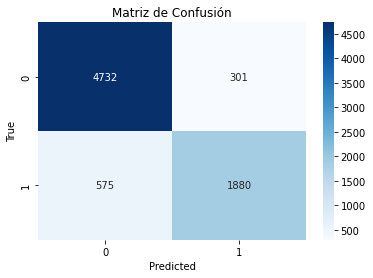

In [56]:
#Matriz de confusión
matriz_conf(y_test_com, y_pred_com)

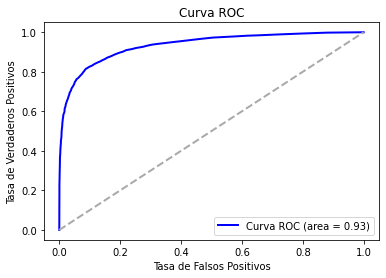

In [57]:
#Curva ROC y AUC
curva_ROC_AUC(rf_com, X_test_com, y_test_com)

## 5. Ajustes y pruebas al modelo 

### 5.1 Análisis de la importancia de las características 

In [146]:
analisis_importancia = pd.DataFrame(rf_com.feature_importances_, index=X_train_com.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)
print(analisis_importancia)

                               Importancia
followers_count                   0.155324
favourites_count                  0.103132
following_count                   0.097679
ratio_favorites_per_age           0.094602
retweet_tweets_count              0.062967
ratio_statuses_count_per_age      0.058935
account_age_days                  0.052990
average_tweets_per_day            0.052687
popular_indicator                 0.045828
ratio_following_per_followers     0.033740
month                             0.027133
verified                          0.026404
day                               0.025291
geo_enabled                       0.024616
avg_word                          0.023391
year                              0.022902
description_character_count       0.022352
description_word_count            0.018126
word_count                        0.016855
default_profile                   0.009920
has_description                   0.006059
has_location                      0.005931
has_lang   

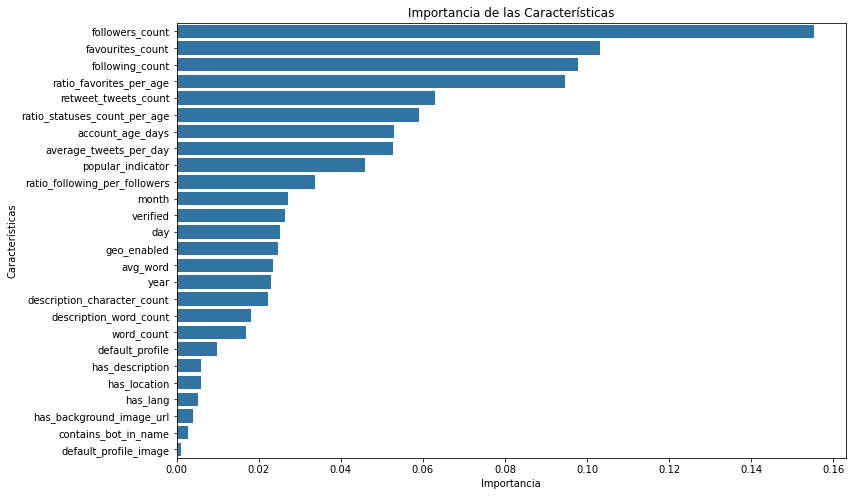

In [147]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crea el gráfico de barras
sns.barplot(x='Importancia', y=analisis_importancia.index, data=analisis_importancia)

# Personaliza los títulos y etiquetas
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')

# Muestra el gráfico
plt.show()

In [148]:
# Seleccionar las características basadas en el análisis anterior
variables_seleccionadas = ['followers_count', 'favourites_count', 'following_count', 'ratio_favorites_per_age', 
                    'retweet_tweets_count', 'average_tweets_per_day', 'verified', 'geo_enabled', 'month', 'day', 'year']

# Preparar X e y
X_red = data_dep[variables_seleccionadas]
y_red = data_dep['account_type'] 

# División en conjunto de entrenamiento y prueba
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf_red = RandomForestClassifier(n_estimators=100, random_state=42)

start_time_red= time.time()
rf_red.fit(X_train_red, y_train_red)
end_time_red = time.time()
execution_time_red = end_time_red- start_time_red
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time_red} segundos.")

El tiempo de ejecución del entrenamiento fue de 4.933213472366333 segundos.


#### Evaluación del modelo

In [149]:
#Reporte de clasificación y precisión 
y_pred_red = eval_modelo(rf_red, X_test_red, y_test_red)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5033
           1       0.85      0.75      0.80      2455

    accuracy                           0.88      7488
   macro avg       0.87      0.84      0.85      7488
weighted avg       0.87      0.88      0.87      7488

Accuracy: 0.8751335470085471


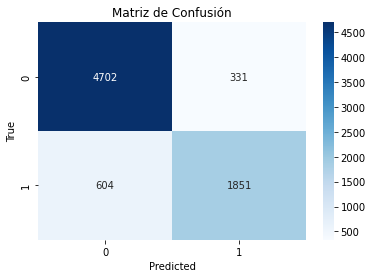

In [150]:
#Matriz de confusión
matriz_conf(y_test_red, y_pred_red)

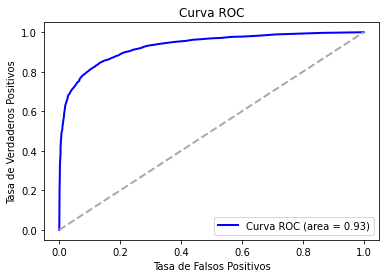

In [151]:
#Curva ROC y AUC
curva_ROC_AUC(rf_red, X_test_red, y_test_red)

### 5.2 Grid Search

In [152]:
# Supongamos que X e y son tus características y etiquetas, respectivamente
X_train_par3, X_test_par3, y_train_par3, y_test_par3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Definir el espacio de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Configurar el modelo y el Grid Search
rf_par3 = RandomForestClassifier(random_state=42)

In [154]:
grid_search = GridSearchCV(estimator=rf_par3, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

In [155]:
# Ejecutar el Grid Search
start_time_par3= time.time()
grid_search.fit(X_train_par3, y_train_par3)
end_time_par3 = time.time()
execution_time_par3 = end_time_par3 - start_time_par3
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time_par3} segundos.")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
El tiempo de ejecución del entrenamiento fue de 1931.3230702877045 segundos.


In [156]:
#Los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
Mejor precisión: 0.8801001265452552


In [157]:
# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_par3 = best_model.predict(X_test_par3)
print("Precisión en el conjunto de prueba:", accuracy_score(y_test_par3, y_pred_par3))

Precisión en el conjunto de prueba: 0.8831463675213675


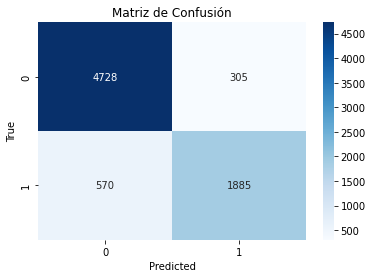

In [158]:
#Matriz de confusión
matriz_conf(y_test_par3, y_pred_par3)

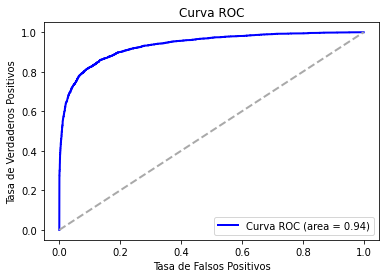

In [159]:
#Curva ROC y AUC
curva_ROC_AUC(grid_search, X_test_par3, y_test_par3)

## 5. Resultados

#### Revision métricas

In [160]:
accuracy_rf_com = accuracy_score(y_test_com, y_pred_com)
accuracy_rf_red = accuracy_score(y_test_red, y_pred_red)
accuracy_rf_par3 = accuracy_score(y_test_par3, y_pred_par3)
auc_rf_com = roc_auc_score(y_test_com, y_pred_com)
auc_rf_red = roc_auc_score(y_test_red, y_pred_red)
auc_rf_par3 =roc_auc_score(y_test_par3, y_pred_par3)
recall_rf_com = recall_score(y_test_com, y_pred_com)
recall_rf_red = recall_score(y_test_red, y_pred_red)
recall_rf_par3 = recall_score(y_test_par3, y_pred_par3)

In [161]:
#Se crea un diccionario con las métricasy se convierte en DF.

#Las siguientes siglas corresponden a los siguientes modelos:
#'Full': Modelo con todas las características.
# 'CR': Modelo con las características reducidas.
# 'Par 3': Modelo con el grid search aplicado.  


metricas_modelo = {
    'Model': ['Full', 'CR', 'GS'],
    'Accuracy': [accuracy_rf_com, accuracy_rf_red, accuracy_rf_par3],
    'Recall': [recall_rf_com, recall_rf_red, recall_rf_par3],
    'ROC AUC': [auc_rf_com, auc_rf_red, auc_rf_par3],
    'Ex. time': [execution_time_com, execution_time_red, execution_time_par3]
}

metricas_df = pd.DataFrame(metricas_modelo)

print(metricas_df)

  Model  Accuracy    Recall   ROC AUC     Ex. time
0  Full  0.883013  0.765784  0.852989     6.723060
1    CR  0.875134  0.753971  0.844103     4.933213
2    GS  0.883146  0.767821  0.853610  1931.323070


#### Validación cruzada

In [162]:
#Validación cruzada con todas las características
valid_cruzada(rf_com, X, y, title='Modelo Full')

#Validación cruzada con características reducidas
valid_cruzada(rf_red, X_red, y_red, title='Modelo CR')

#Validación cruzada con grid search
valid_cruzada(rf_par3, X, y, title='Modelo GS')

Precisión con validación cruzada (Modelo Full): 0.8826592759475806
Precisión con validación cruzada (Modelo CR): 0.8787594963590154
Precisión con validación cruzada (Modelo GS): 0.8826592759475806


In [60]:
# Dividir el dataset
X = data_dep.drop(['account_type'], axis=1)
y = data_dep['account_type']

# Reservar el 5% del dataset para predicciones futuras
X_temp, X_future, y_temp, y_future = train_test_split(X, y, test_size=0.05, random_state=42)

# Dividir el dataset temporal en conjunto de entrenamiento y prueba
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Entrenar el modelo
rf_com = RandomForestClassifier(n_estimators=100, random_state=42)
rf_com.fit(X_train_com, y_train_com)

# Reporte de clasificación y precisión
y_pred_com = eval_modelo(rf_com, X_test_com, y_test_com)

# Método para predecir
def predecir_nuevos_datos(modelo, X_nuevos):
    predicciones = modelo.predict(X_nuevos)
    return predicciones

# Uso del método de predicción en el 5% reservado
predicciones_futuras = predecir_nuevos_datos(rf_com, X_future)
print("Predicciones para el 5% reservado:")
print(predicciones_futuras)

# Crear DataFrame con valores reales y predicciones
pred_df = pd.DataFrame({
    'Real': y_future,
    'Predicción': predicciones_futuras
})

# Mostrar el DataFrame
print(pred_df)

# Contar cuántos valores se han clasificado como 0 y como 1
conteo_predicciones = pred_df['Predicción'].value_counts()
print("Conteo de valores clasificados:")
print(conteo_predicciones)

# Calcular y mostrar el accuracy total de la predicción
accuracy_total = accuracy_score(y_future, predicciones_futuras)
print("Accuracy total de la predicción:")
print(accuracy_total)



              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4740
           1       0.86      0.75      0.80      2374

    accuracy                           0.88      7114
   macro avg       0.87      0.84      0.85      7114
weighted avg       0.87      0.88      0.87      7114

Predicciones para el 5% reservado:
[1 1 0 ... 1 1 0]
       Real  Predicción
36730     0           1
25960     0           1
12307     0           0
27357     1           1
7249      0           0
...     ...         ...
27343     1           1
8211      1           1
9064      1           1
26779     1           1
23967     0           0

[1872 rows x 2 columns]
Conteo de valores clasificados:
Predicción
0    1284
1     588
Name: count, dtype: int64
Accuracy total de la predicción:
0.874465811965812
